In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [22]:
bs = 16

In [14]:
path_img = Path('/home/jupyter/.fastai/data/ps4_games/images')

In [19]:
fnames = get_image_files(path_img,recurse=True)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/ps4_games/images/detroit__become_human/000099.jpg'),
 PosixPath('/home/jupyter/.fastai/data/ps4_games/images/detroit__become_human/000111.jpg'),
 PosixPath('/home/jupyter/.fastai/data/ps4_games/images/detroit__become_human/000013.jpg'),
 PosixPath('/home/jupyter/.fastai/data/ps4_games/images/detroit__become_human/000088.jpg'),
 PosixPath('/home/jupyter/.fastai/data/ps4_games/images/detroit__become_human/000042.jpg')]

In [20]:
np.random.seed(2)
pat = r'.*images/(.*)/\d+.jpg$'

In [23]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

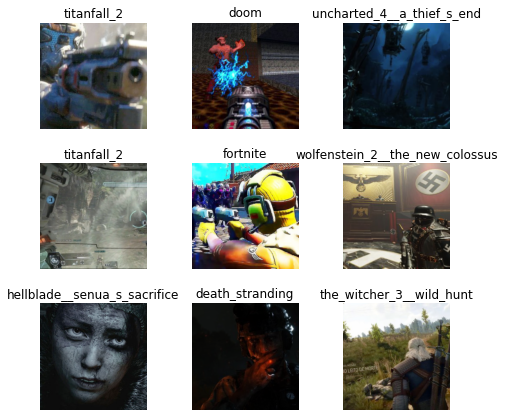

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
print(data.classes)
len(data.classes),data.c

['assassin_s_creed_odyssey', 'battlefield_1', 'bloodborne', 'dark_souls_3', 'death_stranding', 'detroit__become_human', 'dishonored_2', 'doom', 'fallout_4', 'final_fantasy_15', 'fortnite', 'god_of_war', 'grand_theft_auto_5', 'hellblade__senua_s_sacrifice', 'horizon__zero_dawn', 'kingdom_hearts_3', 'marvel_s_spider-man', 'metal_gear_solid_5__the_phantom_pain', 'monster_hunter_world', 'nier__automata', 'persona_5', 'red_dead_redemption_2', 'resident_evil_7__biohazard', 'rise_of_the_tomb_raider', 'the_division_2', 'the_witcher_3__wild_hunt', 'titanfall_2', 'uncharted_4__a_thief_s_end', 'what_remains_of_edith_finch', 'wolfenstein_2__the_new_colossus']


(30, 30)

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.107707,2.000425,0.567223,00:41
1,2.426265,1.676310,0.465162,00:39
2,1.926495,1.433280,0.414131,00:39
3,1.555116,1.397577,0.385672,00:39


In [29]:
learn.save('stage-1')

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

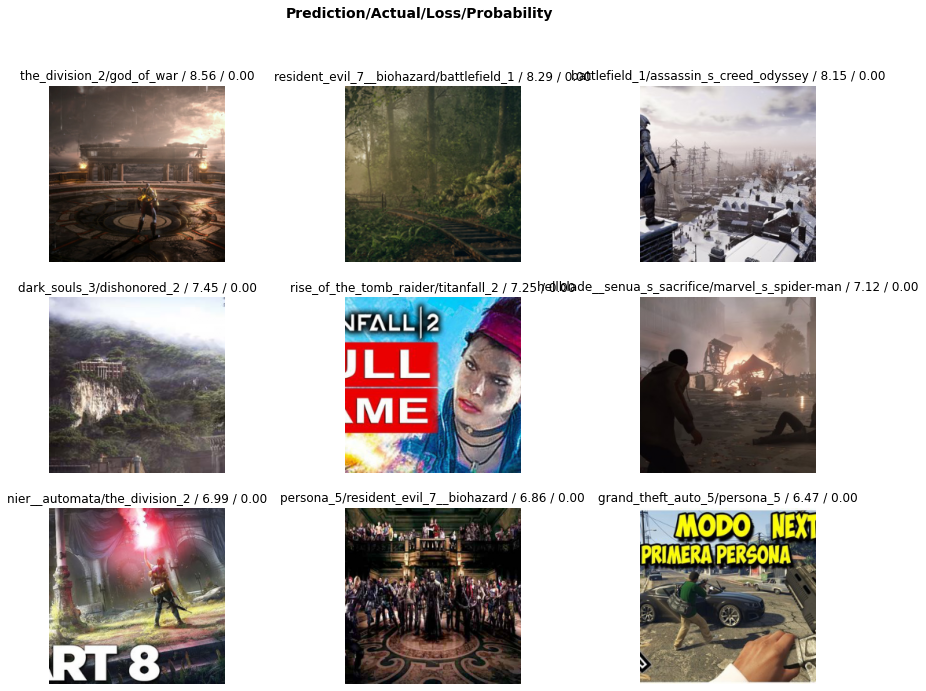

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

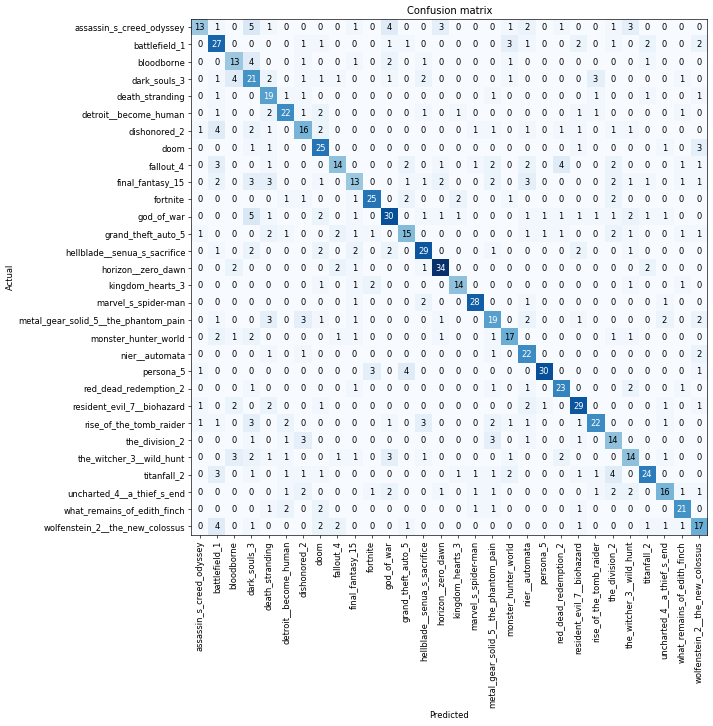

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [49]:
interp.most_confused(min_val=2)

[('assassin_s_creed_odyssey', 'dark_souls_3', 5),
 ('god_of_war', 'dark_souls_3', 5),
 ('assassin_s_creed_odyssey', 'god_of_war', 4),
 ('bloodborne', 'dark_souls_3', 4),
 ('dark_souls_3', 'bloodborne', 4),
 ('dishonored_2', 'battlefield_1', 4),
 ('fallout_4', 'red_dead_redemption_2', 4),
 ('persona_5', 'grand_theft_auto_5', 4),
 ('titanfall_2', 'the_division_2', 4),
 ('wolfenstein_2__the_new_colossus', 'battlefield_1', 4),
 ('assassin_s_creed_odyssey', 'horizon__zero_dawn', 3),
 ('assassin_s_creed_odyssey', 'the_witcher_3__wild_hunt', 3),
 ('battlefield_1', 'monster_hunter_world', 3),
 ('dark_souls_3', 'rise_of_the_tomb_raider', 3),
 ('doom', 'wolfenstein_2__the_new_colossus', 3),
 ('fallout_4', 'battlefield_1', 3),
 ('final_fantasy_15', 'dark_souls_3', 3),
 ('final_fantasy_15', 'death_stranding', 3),
 ('final_fantasy_15', 'nier__automata', 3),
 ('metal_gear_solid_5__the_phantom_pain', 'death_stranding', 3),
 ('metal_gear_solid_5__the_phantom_pain', 'dishonored_2', 3),
 ('persona_5', '

In [52]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (4077 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
detroit__become_human,detroit__become_human,detroit__become_human,detroit__become_human,detroit__become_human
Path: /home/jupyter/.fastai/data/ps4_games/images;

Valid: LabelList (1019 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hellblade__senua_s_sacrifice,resident_evil_7__biohazard,god_of_war,monster_hunter_world,final_fantasy_15
Path: /home/jupyter/.fastai/data/ps4_games/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fals

In [53]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


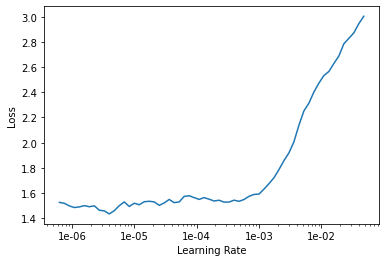

In [54]:
learn.recorder.plot()

In [55]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.569737,1.272274,0.359176,00:56
1,1.295824,1.201509,0.332679,00:56
